# Custom Seeds with the WaterShed Algorithm

#### Previously we did a lot of work for OpenCV to set #Markers to provide seeds to the Watershed Algorithm. But what if we just provide seeds ourselves? Let's try it out!

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

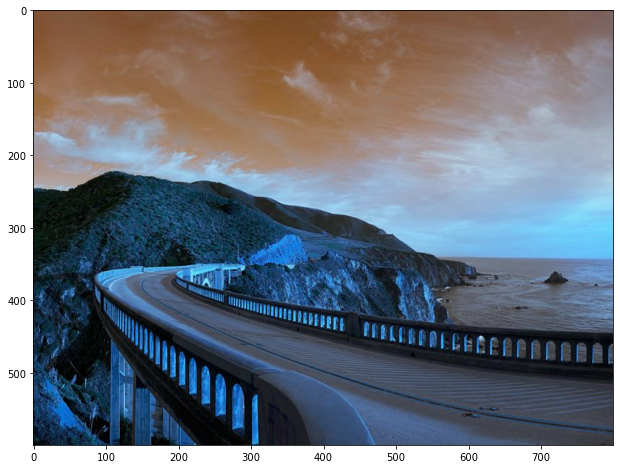

In [2]:
road_image=cv2.imread("../Computer-Vision-with-Python/DATA/road_image.jpg")
# road_image=cv2.cvtColor(road_image,cv2.COLOR_BGR2RGB)
def showImage(img):
    plt.figure(figsize=(12,8))
    plt.imshow(img)
showImage(road_image)

In [3]:
marker=np.zeros(road_image.shape[:2],dtype=np.int32)
segment=np.zeros(road_image.shape,dtype=np.uint8)

In [4]:
segment.shape

(600, 800, 3)

#### Create colors for Markers

In [5]:
from matplotlib import cm

In [6]:
cm.tab10(0)[:3]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [7]:
np.array(cm.tab10(0)[:3])*255

array([ 31., 119., 180.])

In [8]:
tuple(np.array(cm.tab10(0)[:3])*255)

(31.0, 119.0, 180.0)

In [9]:
def createColor(i):
       return tuple(np.array(cm.tab10(i)[:3])*255)

In [10]:
colors=[]
for i in range(10):
    colors.append(createColor(i))

#### setting up marker and segment

In [11]:
n_markers=10
current_marker=1
mark_updated=False

In [12]:
road_copy=road_image.copy()
def mouseCallBack(event,x,y,flag,params):
     global mark_updated
     if event ==cv2.EVENT_LBUTTONDOWN:
            mark_updated=True  
            cv2.circle(marker,(x,y),10,(current_marker),-1)#one color
            cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
            

In [13]:
cv2.namedWindow("Road Image")
cv2.setMouseCallback("Road Image",mouseCallBack)

In [ ]:
while True:
    cv2.imshow("segment",segment)
    cv2.imshow("Road Image",road_copy)
    k=cv2.waitKey(1)
    if k==27:
        break;
    elif k==ord("c"):
        road_copy=road_image.copy()
        marker=np.zeros(road_image.shape[:2],dtype=np.int32)
        segment=np.zeros(road_image.shape,dtype=np.uint8)
    if k>0  and chr(k).isdigit():
        current_marker=int(chr(k))
    if mark_updated :
        markCopy=marker.copy()
        markerCopy=cv2.watershed(road_image,markCopy)
        segment=np.zeros(road_copy.shape,dtype=np.uint8)
        for i in range(n_markers):
            segment[markCopy==(i)]=colors[i]
        mark_updated=False
cv2.destroyAllWindows()
        

In [ ]:
colors